In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

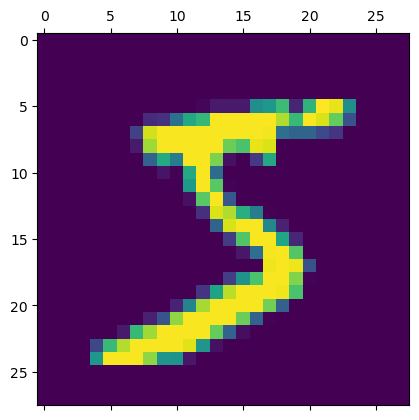

In [7]:
plt.matshow(X_train[0])

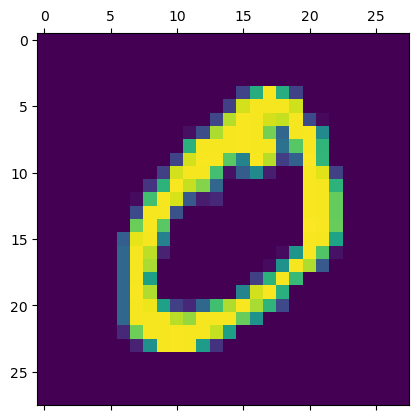

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[2]

4

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [13]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.4666 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 1s 700us/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 1s 725us/step - loss: 0.2733 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.2668 - accuracy: 0.9254


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 601us/step - loss: 0.2689 - accuracy: 0.9258


[0.2689076364040375, 0.9258000254631042]

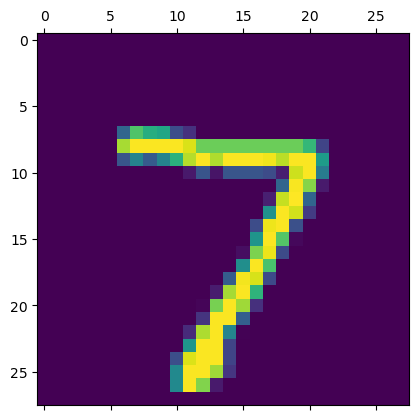

In [15]:
plt.matshow(X_test[0])

In [16]:
y_pred=model.predict(X_test_flattened)
np.argmax(y_pred[0])

313/313 [==============================] - 0s 553us/step


7

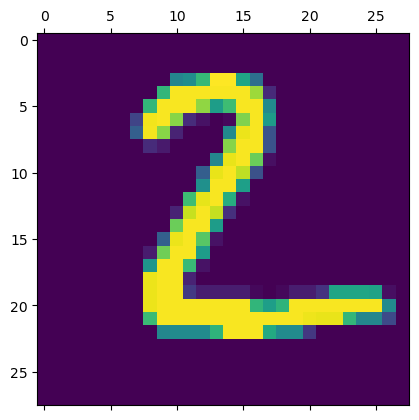

In [17]:
plt.matshow(X_test[1])

In [18]:
y_pred=model.predict(X_test_flattened)
np.argmax(y_pred[1])

313/313 [==============================] - 0s 503us/step


2

In [19]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1118,    4,    2,    0,    1,    3,    2,    5,    0],
       [   8,    8,  928,   17,    8,    3,   10,    8,   38,    4],
       [   4,    0,   21,  921,    0,   25,    2,   10,   20,    7],
       [   2,    1,    4,    1,  931,    0,    8,    3,   10,   22],
       [   9,    2,    3,   28,   12,  790,   11,    4,   28,    5],
       [  16,    3,    9,    1,    8,   12,  905,    2,    2,    0],
       [   1,   11,   25,    9,   10,    1,    0,  939,    1,   31],
       [   7,   10,    7,   26,    9,   36,    8,    9,  854,    8],
       [  11,    7,    1,   12,   40,   10,    0,   17,    4,  907]])>

Text(95.72222222222221, 0.5, 'Truth')

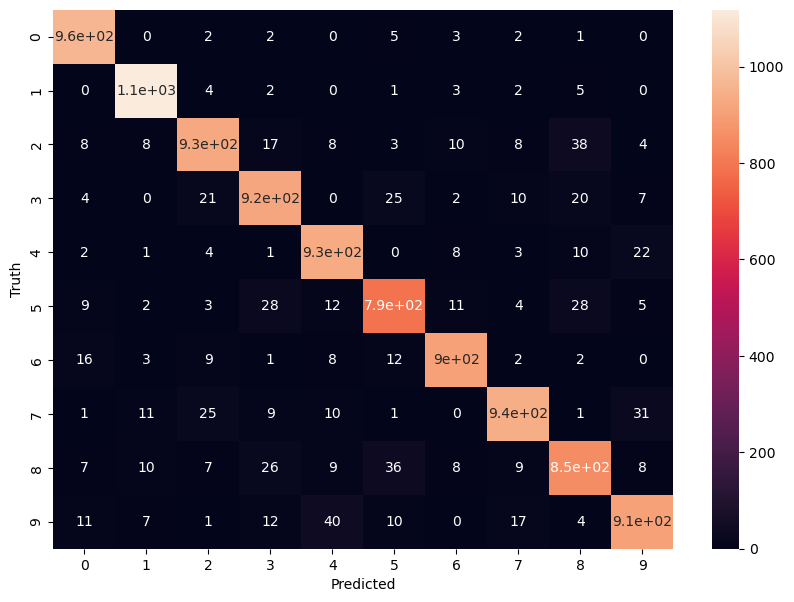

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2704 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0848 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0509 - accuracy: 0.9842


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 751us/step - loss: 0.0787 - accuracy: 0.9755


[0.07865352183580399, 0.9754999876022339]

313/313 [==============================] - 0s 702us/step


Text(95.72222222222221, 0.5, 'Truth')

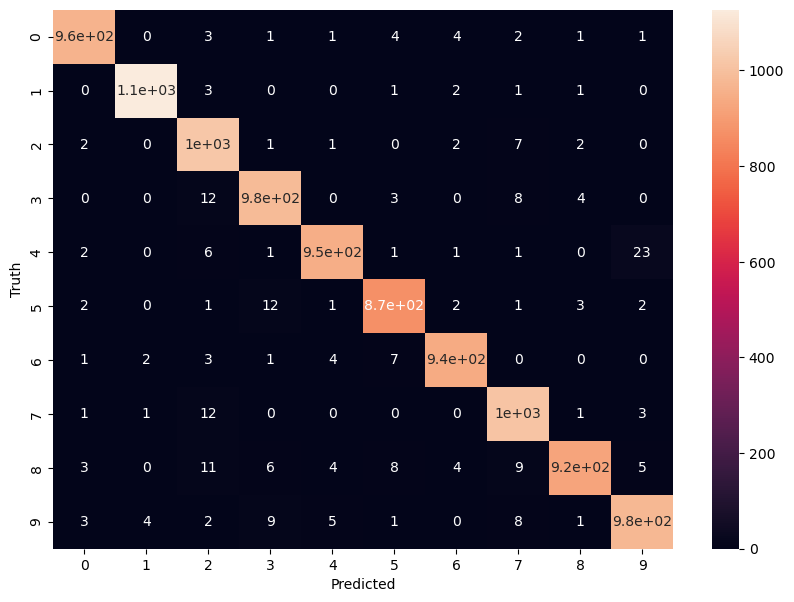

In [24]:
y_pred=model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2702 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1224 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0853 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0515 - accuracy: 0.9846
